In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "/Users/jbeiting/Desktop/CS_539/Team_assignment_4"]).decode("utf8"))

Bagged_Tree_MNIST.ipynb
Classification_Tree_MNIST.ipynb
Gradient_Booster_MNIST.ipynb
MNIST_RandomForest.ipynb
Stacking_Ensemble_MNIST.ipynb
mnist_bgc.csv
mnist_clf.csv
mnist_rf.csv
test.csv
train.csv



In [2]:
train = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/train.csv')
test = pd.read_csv('/Users/jbeiting/Desktop/CS_539/Team_assignment_4/test.csv')

In [3]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))
print ("Testing dataset has %i observations and %i variables" %(test.shape[0], test.shape[1]))

Training dataset has 42000 observations and 785 variables
Testing dataset has 28000 observations and 784 variables


In [4]:
train.head(8)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_x = train.iloc[0:2100,1:]
df_y = train.iloc[0:2100,0]
df_x.shape

(2100, 784)

In [6]:
def print_image(row, df):
    temp = df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

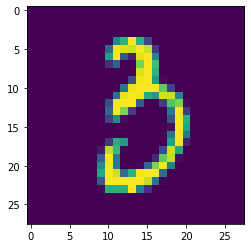

In [7]:
print_image(150, df_x)

In [8]:
# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 100)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (1680, 784)
X_test shape:  (420, 784)


In [9]:
gbc = GradientBoostingClassifier(learning_rate = 0.0125, n_estimators = 720, max_depth = 14,
                      min_samples_split  =100, max_features = 90, min_samples_leaf = 60,
                      subsample = 0.9, warm_start = True 
                      )
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.0125, max_depth=14, max_features=90,
                           min_samples_leaf=60, min_samples_split=100,
                           n_estimators=720, subsample=0.9, warm_start=True)

In [10]:
pred = gbc.predict(X_test)
print("Classification Report: \n", classification_report(y_test, pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.97      0.92      0.95        39
           2       0.98      0.92      0.95        59
           3       0.92      0.92      0.92        37
           4       0.86      0.91      0.88        33
           5       0.95      0.91      0.93        44
           6       0.94      0.98      0.96        46
           7       0.84      0.89      0.86        36
           8       0.93      0.86      0.89        43
           9       0.85      0.95      0.90        42

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.93      0.92      0.92       420

Confusion Matrix: 
 [[40  0  0  0  0  0  1  0  0  0]
 [ 0 36  1  0  1  1  0  0  0  0]
 [ 0  0 54  0  0  0  0  4  1  0]
 [ 0  0  0 34  1  1  0  0  1  0]
 [ 0  0  0  0 30  0  0  0  1  2]
 [ 0  0  0  0  0 40  2  1  0  1

In [11]:
# Cross validation
gbc.fit(df_x, df_y)
score = cross_val_score(gbc, df_x, df_y)
print('Score: ', np.mean(score))

Score:  0.9223809523809523


In [12]:
pred = pd.Series(pred,name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_gbc.csv", index = False)